# Information Retrieval

Bag of Words and TF-IDF

In [1]:
# it can be used for making bag of words across the whole corpora
#https://honingds.com/blog/natural-language-processing-with-python/
#https://www.kaggle.com/ngyptr/python-nltk-sentiment-analysis

## Library Imports

In [2]:
# Import Os to get to the root directory
import os
import sys


# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)

# Import own functions
from libraries import corpus
from libraries import pdf2text

import warnings
warnings.filterwarnings("ignore")

# Import packages

import numpy as np
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
import string # for punctuation
import gc
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
from importlib import reload
reload(corpus)

<module 'libraries.corpus' from 'C:\\Users\\laman\\Desktop\\datascience_project\\libraries\\corpus.py'>

## Data Preprocessing

In [4]:
dataset = pdf2text.get_dataset()

2019-06-26 19:56:24,475 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [5]:
dataset.keys()

dict_keys(['0chain', '0x', '1world', '1x2coin', 'ab-chain', 'abbccoin', 'abcccoin', 'able', 'absolute', 'ace', 'achain', 'acrecoin', 'actinium', 'acuteangle', 'adamant', 'adbank', 'adchainregistry', 'adcoin', 'adhive', 'aditus', 'adshares', 'aion', 'ample!', 'apollocurrency', 'ardor', 'ark', 'basicattentiontoken', 'beam', 'bhpcoin', 'bibox', 'binancecoin', 'bitcoin', 'bitcoindiamond', 'bitcoingold', 'bitshares', 'bitstash', 'bittorrent', 'budbo', 'bytecoin', 'bytom', 'celernetwork', 'chainlink', 'civictokensale', 'cosmochain', 'cosmos', 'crypto', 'cryptonex', 'cryptonote', 'dai', 'dash', 'decentraland', 'dent', 'digixdao', 'dogecoin', 'eidoo', 'elastos', 'enjincoin', 'eos', 'etherace', 'ethereum', 'ethereumclassic', 'factom', 'fantom', 'giant', 'givecoin', 'gnosis', 'golem', 'guaranteedentrancetoken', 'gxchain', 'holo', 'horizen', 'hypercash', 'hyperion', 'icon', 'iexec', 'inocoin', 'iota', 'japancontenttoken', 'komodo', 'kwattcoin', 'latoken', 'lina', 'loopring', 'maidsafecoin', 'make

In [6]:
len(dataset.keys())

143

In [7]:
makeSentences = True
corpora = corpus.makeCleanCorpus(dataset, lemmatize=True, removePunct=True, removeNums=True,makeSentences=makeSentences, 
                                 removeURL=True, removeChar=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: 0chain
Cleaning: 0x
Cleaning: 1world
Cleaning: 1x2coin
Cleaning: ab-chain
Cleaning: abbccoin
Cleaning: abcccoin
Cleaning: able
Cleaning: absolute
Cleaning: ace
Cleaning: achain
Cleaning: acrecoin
Cleaning: actinium
Cleaning: acuteangle
Cleaning: adamant
Cleaning: adbank
Cleaning: adchainregistry
Cleaning: adcoin
Cleaning: adhive
Cleaning: aditus
Cleaning: adshares
Cleaning: aion
Cleaning: ample!
Cleaning: apollocurrency
Cleaning: ardor
Cleaning: ark
Cleaning: basicattentiontoken
Cleaning: beam
Cleaning: bhpcoin
Cleaning: bibox
Cleaning: binancecoin
Cleaning: bitcoin
Cleaning: bitcoindiamond
Cleaning: bitcoingold
Cleaning: bitshares
Cleaning: bitstash
Cleaning: bittorrent
Cleaning: budbo
Cleaning: bytecoin
Cleaning: bytom
Cleaning: celernetwork
Cleaning: chainlink
Cleaning: civictokensale
Cleaning: cosmochain
Cleaning: cosmos
Cleaning: crypto
Cleaning: cryptonex
Cleaning: cryptonote
Cleaning: dai
Cleaning: dash
Cleaning: decentraland
Cleaning: dent
Cleaning: digixdao
Cleaning:

In [8]:
corpora.keys()

dict_keys(['0chain', '0x', '1world', '1x2coin', 'ab-chain', 'abbccoin', 'abcccoin', 'able', 'absolute', 'ace', 'achain', 'acrecoin', 'actinium', 'acuteangle', 'adamant', 'adbank', 'adchainregistry', 'adcoin', 'adhive', 'aditus', 'adshares', 'aion', 'ample!', 'apollocurrency', 'ardor', 'ark', 'basicattentiontoken', 'beam', 'bhpcoin', 'bibox', 'binancecoin', 'bitcoin', 'bitcoindiamond', 'bitcoingold', 'bitshares', 'bitstash', 'bittorrent', 'budbo', 'bytecoin', 'bytom', 'celernetwork', 'chainlink', 'civictokensale', 'cosmochain', 'cosmos', 'crypto', 'cryptonex', 'cryptonote', 'dai', 'dash', 'decentraland', 'dent', 'digixdao', 'dogecoin', 'eidoo', 'elastos', 'enjincoin', 'eos', 'etherace', 'ethereum', 'ethereumclassic', 'factom', 'fantom', 'giant', 'givecoin', 'gnosis', 'golem', 'guaranteedentrancetoken', 'gxchain', 'holo', 'horizen', 'hypercash', 'hyperion', 'icon', 'iexec', 'inocoin', 'iota', 'japancontenttoken', 'komodo', 'kwattcoin', 'latoken', 'lina', 'loopring', 'maidsafecoin', 'make

# Tokenization

Tokenization is the first step. The text documents will be broken down into small pieces, in this case words. These tokenized words are called tokens. 

In [9]:
# Start tokenizing the dataset
tokenizer = nltk.tokenize.RegexpTokenizer('\s+', gaps=True)

if makeSentences:
    #############################################
    # Tokenization on sentences
    tokens = [tokenizer.tokenize(s) for s in corpora["chainlink"]]
    # Flatten the list
    tokens = np.reshape(np.concatenate(tokens), -1)
    #############################################
else:
    #############################################
    # Tokenization on whole corpus (no sentences)
    tokens = tokenizer.tokenize(corpora["chainlink"])
    #############################################

print('We have', len(tokens), 'words in total. \n')
print(tokens[5:10])

We have 6878 words in total. 

['poise' 'revolutionize' 'many' 'industry' 'replace']


# Frequency Distribution

The FreqDist can quickly show how frequent a word occurs in the coprus. Frequency Distribution enables to define the most informative words about the topic of the text document.
https://www.nltk.org/book/ch01.html

In [ ]:
from nltk.probability import FreqDist

# Turn corpus into np before unnest the list
# numpy can handle text as well

fdist = FreqDist(tokens)

fdist.most_common(10)

In [ ]:
import matplotlib.pyplot as plt

fdist.plot(30,cumulative=False)
plt.show()

# N-grams

N-grams is a sequence of N words. Extracting a list of word pairs from a text is known as bigrams. N-gram model predicts the occurrence of a word based on the occurrence of its N – 1 previous words. So here we are answering the question – how far back in the history of a sequence of words should we go to predict the next word?

https://blog.xrds.acm.org/2017/10/introduction-n-grams-need/

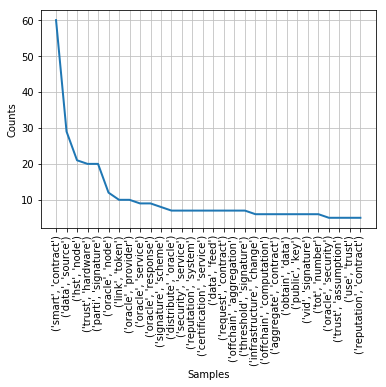

In [12]:
# n=2 - bigram model is the probability of a word based only on its previous word.

from nltk import bigrams, ngrams
bigrams_tokens = bigrams(tokens)
fdist_bigrams = FreqDist(list(bigrams_tokens))
fdist_bigrams.plot(30,cumulative=False)
plt.show()

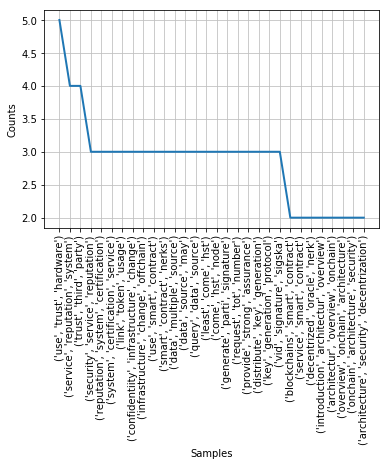

In [13]:
# n=3
trigrams_tokens = ngrams(tokens, 3)
fdist_trigrams = FreqDist(list(trigrams_tokens))
fdist_trigrams.plot(30,cumulative=False)
plt.show()

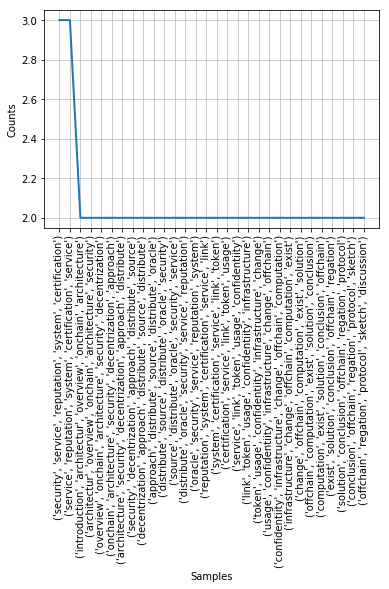

In [14]:
# n=5
grams5_tokens = ngrams(tokens, 5)
fdist_grams5 = FreqDist(list(grams5_tokens))
fdist_grams5.plot(30,cumulative=False)
plt.show()

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
print(vect)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [16]:
# use TreeankWordTokenizer
from nltk.tokenize import TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
vect.set_params(tokenizer=tokenizer.tokenize)

# remove English stop words
vect.set_params(stop_words='english')

# include 1-grams and 2-grams
vect.set_params(ngram_range=(1, 2))

# ignore terms that appear in more than 50% of the documents
vect.set_params(max_df=0.5)

# only keep terms that appear in at least 2 documents
vect.set_params(min_df=2)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.5, max_features=None, min_df=2,
        ngram_range=(1, 2), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=<bound method TreebankWordTokenizer.tokenize of <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x000002AC0FBB8DA0>>,
        vocabulary=None)

In [17]:
# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000) 

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(tokens)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

# see final the clean data
print (train_data_features.shape)

(6878, 1811)


# BAG OF WORDS

A popular and simple method of feature extraction with text data is called the bag-of-words model of text. The feature_extraction module from scikit-learn to create bag-of-words features is used below.

In [18]:
# Initialize a CountVectorizer object: count_vectorizer
count_vec = CountVectorizer(stop_words="english", analyzer='word', 
                            ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None)

chainlink = [corpora['chainlink']]
# Transforms the data into a bag of words
count_train = count_vec.fit(corpora["chainlink"])
bag_of_words = count_vec.transform(corpora["chainlink"])

# Print the first 10 features of the count_vec
print("Every feature:\n{}".format(count_vec.get_feature_names()))
print("\nEvery 3rd feature:\n{}".format(count_vec.get_feature_names()[::3]))

Every feature:


['abhiram', 'ability', 'able', 'absolute', 'abstrac', 'abstract', 'abstraction', 'academic', 'accept', 'acceptable', 'accepted', 'access', 'accessible', 'accommodate', 'accompany', 'accomplish', 'accordance', 'accordingly', 'account', 'accuracy', 'achieve', 'acle', 'acous', 'act', 'action', 'activate', 'activation', 'active', 'actively', 'activity', 'actu', 'actuly', 'adapter', 'add', 'addition', 'additionly', 'address', 'adequate', 'adjunct', 'administer', 'administrative', 'administrator', 'adopt', 'advance', 'adver', 'adversary', 'advisor', 'advocate', 'afterward', 'agenda', 'agg', 'agga', 'aggre', 'aggregate', 'aggregation', 'aggressively', 'agree', 'agreement', 'aim', 'alternatively', 'ample', 'andor', 'answer', 'answersparticularly', 'anticipate', 'apparent', 'apparently', 'appendonly', 'application', 'applicationoriented', 'appreciate', 'approach', 'appropriate', 'appropriately', 'approxi', 'arbitrarily', 'architectur', 'architecture', 'archive', 'area', 'argument', 'arise', 'ar


Every 3rd feature:
['abhiram', 'absolute', 'abstraction', 'acceptable', 'accessible', 'accomplish', 'account', 'acle', 'action', 'active', 'actu', 'add', 'address', 'administer', 'adopt', 'adversary', 'afterward', 'agga', 'aggregation', 'agreement', 'ample', 'answersparticularly', 'apparently', 'applicationoriented', 'appropriate', 'arbitrarily', 'archive', 'arise', 'arrive', 'ask', 'assignment', 'assumes', 'assure', 'att', 'attacker', 'attes', 'audit', 'authenticate', 'authoritative', 'automatic', 'availability', 'avoid', 'away', 'bancing', 'basic', 'begin', 'behf', 'benefit', 'best', 'bidding', 'bind', 'blockchain', 'board', 'bound', 'breach', 'broad', 'bug', 'building', 'bulletin', 'business', 'bytecode', 'capability', 'capture', 'case', 'catyzing', 'cculated', 'cculation', 'centrized', 'certifica', 'chain', 'channel', 'cheaper', 'cheese', 'chlenging', 'chosen', 'circle', 'claim', 'clearly', 'client', 'cloud', 'coauthored', 'cognition', 'collection', 'collusion', 'come', 'commi', '

In [19]:
#Vocabulary and vocabulary ID

print("Vocabulary size: {}".format(len(count_train.vocabulary_)))
print("Vocabulary content:\n {}".format(count_train.vocabulary_))

Vocabulary size: 1723
Vocabulary content:


 {'decentrized': 400, 'nerk': 998, 'abstract': 5, 'smart': 1460, 'contract': 332, 'poise': 1140, 'revolutionize': 1344, 'industry': 781, 'replace': 1305, 'need': 995, 'tradition': 1583, 'leg': 878, 'agreement': 57, 'centrly': 202, 'automate': 116, 'digit': 453, 'performance': 1113, 'verification': 1658, 'execution': 571, 'rely': 1298, 'manu': 922, 'action': 24, 'party': 1096, 'programmat': 1205, 'icly': 745, 'retrieves': 1339, 'update': 1635, 'relevant': 1296, 'change': 209, 'unfortunately': 1626, 'underlie': 1617, 'consensus': 314, 'protocol': 1224, 'blockchains': 154, 'run': 1361, 'support': 1522, 'native': 987, 'communication': 265, 'extern': 592, 'solution': 1469, 'problem': 1191, 'introduce': 830, 'new': 1001, 'functionity': 671, 'cled': 232, 'oracle': 1056, 'provide': 1227, 'connectivity': 313, 'outside': 1073, 'world': 1714, 'exist': 573, 'centrized': 201, 'service': 1411, 'use': 1642, 'single': 1447, 'point': 1139, 'failure': 602, 'make': 918, 'secure': 1384, 'paper': 1081, 'pr

In [119]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
print (vocab)

['abhiram', 'ability', 'able', 'absolute', 'abstrac', 'abstract', 'abstraction', 'academic', 'accept', 'acceptable', 'accepted', 'access', 'accessible', 'accommodate', 'accompany', 'accomplish', 'accordance', 'accordingly', 'account', 'accuracy', 'achieve', 'acle', 'acous', 'across', 'act', 'action', 'activate', 'activation', 'active', 'actively', 'activity', 'actu', 'actuly', 'adapter', 'add', 'addition', 'additionly', 'address', 'adequate', 'adjunct', 'administer', 'administrative', 'administrator', 'adopt', 'advance', 'adver', 'adversary', 'advisor', 'advocate', 'afterward', 'agenda', 'agg', 'agga', 'aggre', 'aggregate', 'aggregation', 'aggressively', 'agree', 'agreement', 'aim', 'also', 'alternatively', 'among', 'amount', 'ample', 'andor', 'another', 'answer', 'answersparticularly', 'anticipate', 'apparent', 'apparently', 'appendonly', 'application', 'applicationoriented', 'appreciate', 'approach', 'appropriate', 'appropriately', 'approxi', 'arbitrarily', 'architectur', 'architectu

Print the counts of each word in the vocabulary:

In [120]:
# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)

# For each, print the vocabulary word and the number of times it 
# appears in the training set
for tag, count in zip(vocab, dist):
    print (count, tag)

1 abhiram
8 ability
5 able
1 absolute
1 abstrac
2 abstract
4 abstraction
1 academic
7 accept
2 acceptable
2 accepted
1 access
1 accessible
1 accommodate
1 accompany
1 accomplish
1 accordance
3 accordingly
2 account
1 accuracy
10 achieve
1 acle
1 acous
6 across
2 act
1 action
1 activate
1 activation
1 active
1 actively
2 activity
1 actu
1 actuly
13 adapter
2 add
7 addition
11 additionly
4 address
1 adequate
1 adjunct
1 administer
1 administrative
2 administrator
2 adopt
1 advance
1 adver
12 adversary
1 advisor
1 advocate
1 afterward
1 agenda
4 agg
1 agga
1 aggre
16 aggregate
24 aggregation
1 aggressively
2 agree
13 agreement
6 aim
1 also
1 alternatively
6 among
3 amount
1 ample
2 andor
7 another
24 answer
1 answersparticularly
2 anticipate
1 apparent
1 apparently
1 appendonly
15 application
1 applicationoriented
1 appreciate
29 approach
2 appropriate
1 appropriately
1 approxi
1 arbitrarily
5 architectur
15 architecture
1 archive
1 area
1 argument
3 arise
1 arises
1 arm
3 arrive
1 articl

1 iacr
1 ible
1 icdcs
1 icly
11 ide
3 idea
1 identic
1 identifier
3 identify
10 ie
1 ilarly
1 illustrate
1 imagine
1 imme
1 impact
1 impediment
3 implement
7 implementation
1 implicit
1 implicitly
3 imply
2 important
1 importantand
2 improvement
1 inability
1 inc
3 incentive
3 incentivized
1 inchainoini
20 include
5 incontract
1 incorporate
4 incorrect
1 incur
2 incurs
3 indeed
1 independence
3 independent
3 independently
1 indicate
5 individu
1 individus
1 industry
1 inescapable
1 influence
1 infor
1 inform
6 information
1 informationflow
1 infrastructur
14 infrastructure
2 ing
4 ingest
1 ini
1 init
6 initi
1 initiate
4 initily
1 innovation
3 innovative
1 innovativetechnologyforcpubasedattestationandseing
6 input
2 insight
2 inspect
6 instance
1 instancespecific
7 instead
1 instruc
7 instruction
1 instructionset
1 instructive
1 instrument
1 insurable
5 insurance
1 insured
9 integrity
1 intel
3 intend
1 intention
4 interact
3 interaction
1 interactive
1 intercommunicate
7 interest
2 in

2 underlie
1 undermine
1 underper
1 underpin
1 underpins
1 undertake
1 undesired
1 undetectable
1 undo
8 unfortunately
1 unfulfilled
3 universly
1 unknown
1 unless
1 unlucky
1 unstructured
1 untrusrthy
1 untrusted
3 update
2 upgradable
1 upgrade
5 upon
2 uptime
8 url
1 usability
5 usage
54 use
2 useful
1 usenix
41 user
1 utable
2 utility
1 utilize
1 utilizes
1 variable
1 variant
5 various
2 vary
2 vast
1 vehicle
1 velop
2 vendor
5 verification
3 verifier
2 verifies
7 verify
1 verifypko
1 verifypksgx
1 versary
6 version
5 via
18 vid
1 vidate
1 vidates
2 vidation
1 vidi
1 vidii
1 vidity
1 vidlooking
3 view
1 virgin
1 virtuous
1 visibility
5 visible
1 vision
3 visit
1 vitik
3 vol
1 voting
14 vue
1 vuea
1 vued
4 vues
1 vulnerabili
1 vulnerability
1 vulnerable
9 wait
2 want
1 ward
1 ware
1 warehouse
20 way
1 weak
1 weaken
2 weakens
4 web
1 website
3 weight
12 well
3 wellfunctioning
1 whatever
1 wherever
6 whether
1 white
1 whitehat
1 whole
5 whose
1 wikiwikiwhitepaper
1 will
2 window
1 wish

# bitcoin

In [20]:
import collections, re

top_1 = corpora["bitcoin"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_1]
bagsofwords[0]

Counter({'bitcoin': 1,
         'electronic': 1,
         'cash': 1,
         'system': 1,
         'satoshi': 1,
         'nakamoto': 1,
         'satoshingmxcom': 1,
         'abstract': 1})

In [21]:
bagsofwords[1]

Counter({'purely': 1,
         'peertopeer': 1,
         'version': 1,
         'electronic': 1,
         'cash': 1,
         'would': 1,
         'allow': 1,
         'online': 1,
         'payment': 1,
         'sent': 1,
         'directly': 1,
         'party': 1,
         'another': 1,
         'without': 1,
         'financial': 1,
         'institution': 1})

In [22]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'transaction': 69, 'block': 65, 'hash': 45, 'node': 38, 'chain': 27, 'attacker': 23, 'nerk': 21, 'proofofwork': 18, 'owner': 17, 'work': 16, 'need': 16, 'coin': 16, 'long': 15, 'hst': 15, 'key': 13, 'payment': 12, 'without': 12, 'trust': 12, 'public': 12, 'new': 12, 'system': 11, 'party': 11, 'make': 11, 'timestamp': 11, 'probability': 11, 'would': 10, 'use': 9, 'proof': 9, 'value': 9, 'problem': 8, 'change': 8, 'next': 8, 'verify': 8, 'time': 8, 'nonce': 8, 'catch': 8, 'header': 8, 'signature': 7, 'power': 7, 'majority': 7, 'add': 7, 'prev': 7, 'incentive': 7, 'link': 7, 'sender': 7, 'electronic': 6, 'solution': 6, 'still': 6, 'control': 6, 'generate': 6, 'broadcast': 6, 'accept': 6, 'could': 6, 'mint': 6, 'double': 6, 'run': 6, 'receive': 6, 'number': 6, 'branch': 6, 'privacy': 6, 'peertopeer': 5, 'require': 5, 'propose': 5, 'model': 5, 'increase': 5, 'must': 5, 'information': 5, 'server': 5, 'previous': 5, 'first': 5, 'item': 5, 'get': 5, 'find': 5, 'amount': 5, 'input': 5,

In [23]:
count = CountVectorizer()
docs = np.array(corpora["bitcoin"])
bag = count.fit_transform(docs)
print(bag)

  (0, 3)	1
  (0, 504)	1
  (0, 357)	1
  (0, 503)	1
  (0, 577)	1
  (0, 81)	1
  (0, 189)	1
  (0, 61)	1
  (1, 292)	1
  (1, 229)	1
  (1, 638)	1
  (1, 30)	1
  (1, 398)	1
  (1, 165)	1
  (1, 517)	1
  (1, 403)	1
  (1, 380)	1
  (1, 19)	1
  (1, 641)	1
  (1, 624)	1
  (1, 404)	1
  (1, 452)	1
  (1, 81)	1
  (1, 189)	1
  (2, 177)	1
  :	:
  (139, 184)	1
  (139, 62)	1
  (139, 358)	1
  (139, 390)	1
  (139, 511)	1
  (139, 112)	1
  (139, 510)	1
  (139, 103)	1
  (140, 133)	1
  (140, 152)	1
  (140, 46)	1
  (140, 263)	1
  (140, 523)	1
  (141, 460)	1
  (142, 140)	1
  (142, 446)	1
  (142, 308)	1
  (142, 449)	1
  (143, 32)	1
  (143, 390)	1
  (143, 432)	1
  (144, 31)	1
  (144, 583)	1
  (144, 298)	1
  (144, 434)	1


# ethereum

In [24]:
top_2 = corpora["ethereum"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_2]
bagsofwords[0]

Counter({'ethereum': 1})

In [25]:
bagsofwords[1]

Counter({'extgeneration': 1,
         'mart': 1,
         'contract': 1,
         'decentralize': 1,
         'application': 1,
         'platform': 1,
         'documentation': 2,
         'docschatabsvg': 1,
         'introductory': 1,
         'paper': 1,
         'introduce': 1,
         'launch': 1,
         'maintain': 1})

In [26]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'transaction': 130, 'block': 128, 'contract': 125, 'state': 60, 'protocol': 58, 'would': 58, 'use': 56, 'code': 54, 'node': 54, 'provide': 53, 'miner': 52, 'blockchain': 43, 'data': 43, 'decentralize': 41, 'application': 39, 'value': 39, 'account': 39, 'system': 36, 'time': 36, 'gas': 35, 'include': 34, 'execution': 32, 'ether': 32, 'first': 31, 'currency': 30, 'message': 30, 'fee': 30, 'tree': 29, 'also': 28, 'implement': 27, 'create': 27, 'storage': 27, 'mining': 27, 'every': 27, 'allow': 26, 'take': 26, 'need': 26, 'even': 25, 'nerk': 25, 'like': 24, 'follow': 24, 'transition': 23, 'exist': 23, 'work': 23, 'sender': 23, 'hash': 23, 'number': 23, 'however': 22, 'function': 21, 'change': 21, 'require': 21, 'valid': 21, 'make': 21, 'run': 21, 'computational': 20, 'problem': 20, 'set': 20, 'add': 20, 'store': 20, 'cost': 20, 'script': 20, 'another': 19, 'process': 19, 'attacker': 19, 'financial': 18, 'key': 18, 'proof': 18, 'return': 18, 'send': 18, 'way': 18, 'large': 18, 'pay

In [27]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'transaction': 130, 'block': 128, 'contract': 125, 'state': 60, 'protocol': 58, 'would': 58, 'use': 56, 'code': 54, 'node': 54, 'provide': 53, 'miner': 52, 'blockchain': 43, 'data': 43, 'decentralize': 41, 'application': 39, 'value': 39, 'account': 39, 'system': 36, 'time': 36, 'gas': 35, 'include': 34, 'execution': 32, 'ether': 32, 'first': 31, 'currency': 30, 'message': 30, 'fee': 30, 'tree': 29, 'also': 28, 'implement': 27, 'create': 27, 'storage': 27, 'mining': 27, 'every': 27, 'allow': 26, 'take': 26, 'need': 26, 'even': 25, 'nerk': 25, 'like': 24, 'follow': 24, 'transition': 23, 'exist': 23, 'work': 23, 'sender': 23, 'hash': 23, 'number': 23, 'however': 22, 'function': 21, 'change': 21, 'require': 21, 'valid': 21, 'make': 21, 'run': 21, 'computational': 20, 'problem': 20, 'set': 20, 'add': 20, 'store': 20, 'cost': 20, 'script': 20, 'another': 19, 'process': 19, 'attacker': 19, 'financial': 18, 'key': 18, 'proof': 18, 'return': 18, 'send': 18, 'way': 18, 'large': 18, 'pay

In [28]:
count = CountVectorizer()
docs = np.array(corpora["ethereum"])
bag = count.fit_transform(docs)
print(bag)

  (0, 557)	1
  (1, 963)	1
  (1, 908)	1
  (1, 859)	1
  (1, 1125)	1
  (1, 862)	1
  (1, 468)	1
  (1, 471)	2
  (1, 1173)	1
  (1, 71)	1
  (1, 399)	1
  (1, 341)	1
  (1, 976)	1
  (1, 607)	1
  (2, 346)	1
  (2, 876)	1
  (2, 234)	1
  (2, 158)	1
  (2, 858)	1
  (2, 857)	1
  (2, 123)	1
  (2, 1450)	1
  (2, 93)	1
  (2, 451)	1
  (2, 576)	1
  :	:
  (538, 766)	1
  (538, 1621)	1
  (539, 1144)	1
  (539, 713)	1
  (540, 33)	1
  (540, 699)	1
  (540, 1603)	1
  (540, 766)	1
  (541, 635)	1
  (541, 1235)	1
  (541, 976)	1
  (542, 147)	1
  (543, 715)	1
  (543, 766)	1
  (543, 1621)	1
  (544, 1521)	2
  (544, 1741)	1
  (544, 168)	1
  (544, 1740)	1
  (544, 960)	1
  (544, 1621)	1
  (544, 1398)	1
  (544, 1547)	1
  (544, 756)	1
  (544, 1125)	1


# xrp

In [29]:
top_3 = corpora["xrp"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_3]
bagsofwords[0]

Counter({'rippleconsensuswhitepaperupdated': 1,
         'ripple': 1,
         'protocol': 1,
         'consensus': 2,
         'algorithm': 1,
         'davidripplecom': 1,
         'nyoungsnyuedu': 1,
         'arthurripplecom': 1,
         'abstract': 1,
         'sever': 1,
         'gorithms': 1,
         'exist': 1,
         'specificly': 1,
         'pertains': 1,
         'distribute': 1,
         'payment': 1,
         'system': 1,
         'many': 1,
         'suffer': 1,
         'high': 1,
         'latency': 1,
         'induced': 1,
         'requirement': 1,
         'node': 1,
         'within': 1,
         'nerk': 1,
         'communicate': 1,
         'synchronously': 1})

In [30]:
bagsofwords[1]

Counter({'work': 1,
         'present': 1,
         'novel': 1,
         'consensus': 1,
         'gorithm': 1,
         'circumvents': 1,
         'requirement': 1,
         'utilize': 1,
         'collectivelytrusted': 1,
         'subnerks': 1,
         'within': 1,
         'large': 1,
         'nerk': 1})

In [31]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'consensus': 89, 'node': 73, 'nerk': 51, 'transaction': 51, 'agreement': 27, 'ledger': 27, 'correctness': 26, 'process': 23, 'bound': 23, 'system': 19, 'distribute': 18, 'require': 18, 'server': 18, 'round': 18, 'may': 17, 'set': 17, 'gorithm': 16, 'failure': 16, 'even': 15, 'user': 15, 'reach': 15, 'ripple': 14, 'problem': 14, 'work': 13, 'probability': 13, 'show': 12, 'latency': 11, 'utility': 11, 'low': 11, 'size': 11, 'case': 11, 'member': 10, 'must': 10, 'achieve': 10, 'possible': 10, 'face': 9, 'correct': 9, 'guarantee': 9, 'number': 9, 'lastclosed': 9, 'vote': 9, 'protocol': 8, 'payment': 8, 'result': 8, 'convergence': 8, 'thus': 8, 'example': 8, 'threshold': 8, 'consen': 8, 'sus': 8, 'apply': 8, 'faulty': 8, 'vues': 8, 'since': 8, 'different': 8, 'gorithms': 7, 'high': 7, 'large': 7, 'trust': 7, 'much': 7, 'know': 7, 'micious': 7, 'include': 7, 'order': 7, 'represent': 7, 'note': 7, 'strong': 7, 'fork': 7, 'clique': 7, 'requirement': 6, 'addition': 6, 'connectivity': 6

In [32]:
count = CountVectorizer()
docs = np.array(corpora["xrp"])
bag = count.fit_transform(docs)
print(bag)

  (0, 676)	1
  (0, 104)	1
  (0, 434)	1
  (0, 766)	1
  (0, 440)	1
  (0, 580)	1
  (0, 329)	1
  (0, 365)	1
  (0, 296)	1
  (0, 668)	1
  (0, 396)	1
  (0, 677)	1
  (0, 481)	1
  (0, 187)	1
  (0, 488)	1
  (0, 645)	1
  (0, 226)	1
  (0, 283)	1
  (0, 613)	1
  (0, 2)	1
  (0, 35)	1
  (0, 452)	1
  (0, 148)	1
  (0, 22)	1
  (0, 119)	2
  :	:
  (178, 714)	1
  (179, 43)	1
  (179, 19)	1
  (180, 514)	1
  (180, 673)	1
  (180, 26)	1
  (180, 109)	1
  (180, 187)	1
  (181, 315)	1
  (181, 242)	1
  (181, 523)	1
  (181, 187)	1
  (181, 119)	1
  (182, 356)	1
  (183, 702)	1
  (183, 69)	1
  (183, 240)	1
  (183, 119)	1
  (184, 714)	1
  (185, 471)	1
  (185, 732)	1
  (185, 119)	1
  (186, 514)	1
  (186, 677)	1
  (186, 187)	1


# eos

In [33]:
top_4 = corpora["eos"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_4]
bagsofwords[0]

Counter({'eosio': 2,
         'technical': 1,
         'white': 1,
         'paper': 1,
         'abstract': 1,
         'software': 1,
         'introduces': 1,
         'new': 1,
         'blockchain': 1,
         'architecture': 1,
         'design': 1,
         'enable': 1,
         'vertical': 1,
         'horizontal': 1,
         'scale': 1,
         'decentralize': 1,
         'application': 1})

In [34]:
bagsofwords[1]

Counter({'achieve': 1,
         'create': 1,
         'operating': 1,
         'systemlike': 1,
         'construct': 1,
         'upon': 1,
         'application': 1,
         'built': 1})

In [35]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'block': 122, 'account': 84, 'blockchain': 78, 'producer': 74, 'transaction': 72, 'eosio': 66, 'application': 66, 'software': 62, 'permission': 45, 'use': 45, 'token': 36, 'state': 35, 'user': 34, 'process': 34, 'proof': 28, 'require': 26, 'may': 24, 'parallel': 24, 'time': 22, 'new': 18, 'include': 18, 'change': 18, 'would': 18, 'bandwidth': 17, 'free': 16, 'define': 16, 'need': 16, 'holder': 16, 'key': 15, 'developer': 15, 'blockchains': 15, 'computational': 15, 'enables': 15, 'make': 14, 'performance': 14, 'algorithm': 14, 'constitution': 14, 'computation': 14, 'schedule': 13, 'without': 13, 'usage': 13, 'cost': 13, 'platform': 13, 'number': 13, 'produce': 13, 'communication': 12, 'content': 12, 'recovery': 12, 'name': 12, 'pay': 12, 'code': 12, 'exchange': 12, 'must': 12, 'give': 12, 'every': 12, 'also': 12, 'another': 12, 'deliver': 12, 'take': 12, 'provide': 11, 'business': 11, 'data': 11, 'support': 11, 'consensus': 11, 'level': 11, 'storage': 11, 'fork': 11, 'chain': 1

In [36]:
count = CountVectorizer()
docs = np.array(corpora["eos"])
bag = count.fit_transform(docs)
print(bag)

  (0, 66)	1
  (0, 269)	1
  (0, 924)	1
  (0, 504)	1
  (0, 1093)	1
  (0, 349)	1
  (0, 293)	1
  (0, 73)	1
  (0, 116)	1
  (0, 702)	1
  (0, 570)	1
  (0, 979)	1
  (0, 5)	1
  (0, 750)	1
  (0, 1114)	1
  (0, 1022)	1
  (0, 362)	2
  (1, 129)	1
  (1, 1078)	1
  (1, 224)	1
  (1, 1019)	1
  (1, 733)	1
  (1, 252)	1
  (1, 21)	1
  (1, 66)	1
  :	:
  (352, 801)	1
  (352, 887)	1
  (352, 200)	1
  (352, 828)	1
  (352, 394)	1
  (352, 107)	1
  (352, 202)	1
  (352, 1024)	1
  (352, 293)	1
  (352, 116)	1
  (352, 979)	1
  (352, 362)	1
  (353, 289)	1
  (353, 330)	1
  (353, 978)	1
  (353, 923)	1
  (353, 460)	1
  (353, 120)	1
  (353, 503)	1
  (353, 757)	1
  (353, 464)	1
  (353, 66)	1
  (353, 269)	1
  (353, 116)	1
  (353, 979)	1


# binancecoin

In [37]:
top_5 = corpora["binancecoin"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_5]
bagsofwords[0]

Counter({'exchange': 3,
         'intro': 2,
         'problem': 1,
         'match': 1,
         'engine': 1,
         'feature': 1,
         'rollout': 1,
         'coin': 2,
         'device': 1,
         'coverage': 1,
         'multilingual': 1,
         'support': 1,
         'preview': 1,
         'revenue': 1,
         'model': 1,
         'allocation': 1,
         'schedule': 1,
         'value': 1,
         'burn': 1,
         'vest': 1,
         'plan': 1,
         'team': 2,
         'fund': 1,
         'usage': 1,
         'chief': 1,
         'architect': 1,
         'engineering': 1,
         'director': 2,
         'operation': 1,
         'investor': 1,
         'advisor': 1,
         'risk': 1,
         'security': 1,
         'market': 1,
         'competition': 1,
         'view': 1,
         'fundamentally': 1,
         'different': 1,
         'type': 1,
         'deal': 2,
         'fiat': 1,
         'currency': 1,
         'purely': 1,
         'crypto': 1})

In [38]:
bagsofwords[1]

Counter({'latter': 1, 'focus': 1})

In [39]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'exchange': 44, 'system': 27, 'team': 21, 'trading': 18, 'work': 17, 'fee': 17, 'coin': 14, 'investor': 14, 'year': 14, 'security': 12, 'experience': 12, 'platform': 12, 'client': 12, 'cofounder': 12, 'data': 11, 'crypto': 10, 'company': 10, 'support': 9, 'many': 9, 'user': 9, 'engine': 8, 'market': 8, 'financial': 8, 'trader': 8, 'blockchain': 8, 'ceo': 8, 'match': 7, 'director': 7, 'time': 7, 'industry': 7, 'service': 7, 'include': 7, 'july': 7, 'use': 7, 'lead': 7, 'responsible': 7, 'revenue': 6, 'big': 6, 'base': 6, 'future': 6, 'new': 6, 'run': 6, 'may': 6, 'built': 6, 'high': 6, 'large': 6, 'founder': 6, 'product': 6, 'problem': 5, 'plan': 5, 'risk': 5, 'focus': 5, 'finance': 5, 'number': 5, 'poor': 5, 'tech': 5, 'order': 5, 'follow': 5, 'provide': 5, 'native': 5, 'english': 5, 'start': 5, 'prior': 5, 'also': 5, 'architect': 4, 'operation': 4, 'competition': 4, 'well': 4, 'initial': 4, 'development': 4, 'standard': 4, 'ensure': 4, 'first': 4, 'partner': 4, 'come': 4, 'kn

In [40]:
count = CountVectorizer()
docs = np.array(corpora["binancecoin"])
bag = count.fit_transform(docs)
print(bag)

  (0, 146)	1
  (0, 466)	1
  (0, 153)	1
  (0, 226)	1
  (0, 162)	2
  (0, 605)	1
  (0, 179)	1
  (0, 249)	1
  (0, 622)	1
  (0, 117)	1
  (0, 358)	1
  (0, 510)	1
  (0, 495)	1
  (0, 12)	1
  (0, 303)	1
  (0, 402)	1
  (0, 181)	2
  (0, 201)	1
  (0, 35)	1
  (0, 93)	1
  (0, 613)	1
  (0, 248)	1
  (0, 582)	2
  (0, 434)	1
  (0, 621)	1
  :	:
  (174, 361)	1
  (174, 122)	1
  (174, 163)	1
  (174, 114)	1
  (174, 14)	1
  (174, 116)	1
  (174, 495)	1
  (175, 438)	1
  (175, 648)	1
  (175, 414)	1
  (175, 90)	1
  (175, 554)	1
  (175, 259)	1
  (175, 471)	1
  (175, 456)	1
  (175, 309)	1
  (175, 478)	1
  (175, 595)	1
  (175, 491)	1
  (175, 488)	1
  (175, 282)	1
  (175, 632)	1
  (175, 218)	1
  (175, 54)	1
  (175, 582)	1


# tether

In [41]:
top_6 = corpora["tether"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_6]
bagsofwords[0]

Counter({'tether': 1, 'currency': 1, 'blockchain': 1, 'abstract': 1})

In [42]:
bagsofwords[1]

Counter({'digital': 1,
         'token': 1,
         'back': 1,
         'fiat': 1,
         'currency': 1,
         'provide': 1,
         'individual': 1,
         'organization': 1,
         'robust': 1,
         'decentralize': 1,
         'method': 1,
         'exchange': 1,
         'value': 1,
         'use': 1,
         'familiar': 1,
         'accounting': 1,
         'unit': 1})

In [43]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'tether': 69, 'exchange': 65, 'user': 57, 'fiat': 39, 'reserve': 36, 'currency': 35, 'system': 32, 'asset': 32, 'bank': 29, 'wallet': 27, 'account': 27, 'process': 26, 'limited': 25, 'audit': 24, 'blockchain': 23, 'risk': 22, 'cryptocurrency': 21, 'issue': 21, 'proof': 20, 'exist': 17, 'business': 17, 'value': 16, 'circulation': 16, 'market': 15, 'time': 15, 'balance': 15, 'could': 15, 'secure': 14, 'financial': 14, 'digital': 13, 'token': 13, 'implementation': 13, 'store': 13, 'party': 13, 'like': 13, 'database': 13, 'would': 13, 'decentralize': 12, 'use': 12, 'price': 12, 'merchant': 12, 'trust': 12, 'service': 12, 'provide': 11, 'method': 11, 'technology': 11, 'see': 11, 'via': 11, 'individual': 10, 'third': 10, 'deposit': 10, 'approach': 10, 'total': 10, 'fund': 9, 'held': 9, 'create': 9, 'payment': 9, 'cryptocurrencies': 9, 'banking': 9, 'transfer': 9, 'also': 9, 'amount': 9, 'back': 8, 'unit': 8, 'innovation': 8, 'weakness': 8, 'solvency': 8, 'flaw': 8, 'compliance': 8, 

In [44]:
count = CountVectorizer()
docs = np.array(corpora["tether"])
bag = count.fit_transform(docs)
print(bag)

  (0, 3)	1
  (0, 108)	1
  (0, 237)	1
  (0, 884)	1
  (1, 939)	1
  (1, 12)	1
  (1, 348)	1
  (1, 950)	1
  (1, 958)	1
  (1, 332)	1
  (1, 549)	1
  (1, 251)	1
  (1, 780)	1
  (1, 612)	1
  (1, 448)	1
  (1, 697)	1
  (1, 355)	1
  (1, 83)	1
  (1, 897)	1
  (1, 273)	1
  (1, 237)	1
  (2, 489)	1
  (2, 396)	1
  (2, 791)	1
  (2, 232)	1
  :	:
  (233, 337)	1
  (233, 679)	2
  (233, 382)	1
  (233, 472)	1
  (233, 688)	1
  (233, 762)	1
  (233, 64)	1
  (233, 870)	1
  (233, 880)	1
  (233, 473)	1
  (233, 65)	1
  (233, 251)	1
  (233, 83)	1
  (233, 897)	2
  (233, 273)	1
  (233, 884)	1
  (234, 77)	1
  (234, 103)	1
  (234, 401)	1
  (234, 562)	1
  (234, 979)	1
  (234, 941)	1
  (234, 198)	1
  (234, 772)	1
  (234, 732)	1


# tron

In [45]:
top_7 = corpora["tron"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_7]
bagsofwords[0]

Counter({'advanced': 1,
         'decentralize': 1,
         'blockchain': 1,
         'platform': 1,
         'version': 2,
         'foundation': 1})

In [46]:
bagsofwords[1]

Counter({'introduction': 1})

In [47]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'block': 79, 'nerk': 69, 'transaction': 66, 'token': 65, 'account': 64, 'contract': 58, 'reward': 48, 'vote': 43, 'smart': 41, 'bandwidth': 39, 'total': 30, 'use': 29, 'trc': 28, 'point': 27, 'developer': 25, 'address': 23, 'key': 23, 'create': 22, 'data': 21, 'cost': 21, 'also': 21, 'description': 21, 'per': 21, 'example': 21, 'hash': 20, 'range': 20, 'witness': 19, 'eg': 19, 'blockchain': 18, 'function': 18, 'proposal': 17, 'transfer': 17, 'round': 17, 'modify': 17, 'byte': 16, 'energy': 16, 'candidate': 16, 'fee': 15, 'parameter': 15, 'public': 14, 'time': 14, 'new': 14, 'pair': 14, 'freeze': 14, 'set': 14, 'node': 14, 'storage': 13, 'system': 13, 'support': 13, 'number': 13, 'code': 13, 'every': 13, 'header': 12, 'consensus': 12, 'structure': 12, 'trading': 12, 'limit': 12, 'decentralize': 11, 'asset': 11, 'wallet': 11, 'application': 11, 'type': 11, 'mechanism': 11, 'user': 11, 'private': 11, 'development': 11, 'call': 11, 'balance': 11, 'creation': 10, 'deployment': 10, 

In [48]:
count = CountVectorizer()
docs = np.array(corpora["tron"])
bag = count.fit_transform(docs)
print(bag)

  (0, 414)	1
  (0, 1028)	2
  (0, 699)	1
  (0, 101)	1
  (0, 250)	1
  (0, 29)	1
  (1, 519)	1
  (2, 1032)	1
  (3, 82)	1
  (4, 462)	1
  (5, 974)	1
  (5, 943)	1
  (5, 941)	1
  (5, 936)	1
  (5, 825)	1
  (5, 818)	1
  (5, 932)	1
  (5, 748)	1
  (5, 813)	1
  (5, 532)	1
  (5, 467)	1
  (5, 451)	1
  (5, 1044)	2
  (5, 155)	1
  (5, 456)	1
  :	:
  (463, 555)	1
  (463, 376)	1
  (463, 922)	1
  (463, 599)	1
  (463, 323)	1
  (463, 139)	1
  (463, 872)	1
  (463, 497)	1
  (463, 826)	1
  (463, 185)	1
  (463, 634)	1
  (463, 101)	2
  (464, 915)	1
  (464, 324)	1
  (464, 247)	1
  (464, 261)	1
  (464, 764)	1
  (464, 957)	1
  (464, 693)	1
  (464, 163)	1
  (464, 219)	1
  (464, 633)	1
  (464, 963)	1
  (464, 6)	1
  (464, 250)	1


# stellar

In [49]:
top_8 = corpora["stellar"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_8]
bagsofwords[0]

Counter({'consensus': 3,
         'protocol': 1,
         'federate': 2,
         'internetlevel': 1,
         'paper': 1,
         'introduces': 1,
         'new': 1,
         'model': 1,
         'call': 1,
         'agreement': 1})

In [50]:
bagsofwords[1]

Counter({'achieves': 1,
         'robustness': 1,
         'quorum': 2,
         'slicesindividual': 1,
         'trust': 1,
         'decision': 1,
         'make': 1,
         'node': 1,
         'together': 1,
         'determine': 1,
         'systemlevel': 1})

In [51]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'node': 488, 'quorum': 189, 'set': 139, 'intact': 123, 'ballot': 115, 'value': 111, 'statement': 110, 'vote': 109, 'protocol': 105, 'accept': 96, 'message': 74, 'system': 73, 'consensus': 69, 'intersection': 63, 'slice': 62, 'theorem': 58, 'commit': 58, 'illbehaved': 57, 'may': 56, 'slot': 54, 'safety': 52, 'confirm': 50, 'agreement': 47, 'must': 44, 'wellbehaved': 44, 'ratify': 41, 'let': 40, 'accepted': 37, 'every': 36, 'liveness': 35, 'state': 34, 'definition': 32, 'federate': 31, 'nominate': 31, 'voting': 30, 'figure': 30, 'proof': 29, 'high': 29, 'candidate': 29, 'abort': 29, 'guarantee': 28, 'vblocking': 28, 'possible': 26, 'prepared': 26, 'new': 25, 'agree': 25, 'first': 25, 'hence': 25, 'tier': 25, 'fail': 24, 'befoul': 24, 'accepts': 23, 'iff': 23, 'stuck': 23, 'nomination': 23, 'transaction': 22, 'property': 22, 'however': 22, 'despite': 22, 'contradictory': 22, 'also': 21, 'participant': 21, 'update': 21, 'follow': 21, 'make': 20, 'member': 20, 'failure': 20, 'witho

In [52]:
count = CountVectorizer()
docs = np.array(corpora["stellar"])
bag = count.fit_transform(docs)
print(bag)

  (0, 50)	1
  (0, 212)	1
  (0, 1044)	1
  (0, 1081)	1
  (0, 879)	1
  (0, 1178)	1
  (0, 868)	1
  (0, 644)	2
  (0, 1326)	1
  (0, 327)	3
  (1, 1637)	1
  (1, 459)	1
  (1, 1712)	1
  (1, 1090)	1
  (1, 989)	1
  (1, 423)	1
  (1, 1740)	1
  (1, 1546)	1
  (1, 1349)	2
  (1, 1458)	1
  (1, 16)	1
  (2, 867)	1
  (2, 1771)	1
  (2, 1538)	1
  (2, 1723)	1
  :	:
  (889, 7)	2
  (889, 1583)	1
  (889, 487)	1
  (889, 1544)	1
  (889, 1782)	1
  (889, 1506)	2
  (889, 1850)	1
  (889, 1406)	1
  (889, 1106)	1
  (889, 960)	1
  (889, 1816)	3
  (889, 1435)	1
  (889, 967)	1
  (889, 45)	2
  (889, 596)	1
  (889, 187)	1
  (889, 1143)	1
  (889, 557)	1
  (889, 1136)	1
  (889, 1023)	1
  (889, 1636)	1
  (889, 1349)	2
  (889, 50)	2
  (889, 644)	3
  (889, 1326)	5


# dash

In [53]:
top_9 = corpora["dash"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_9]
bagsofwords[0]

Counter({'dash': 2,
         'edit': 1,
         'page': 1,
         'revision': 1,
         'paymentsfocused': 1,
         'cryptocurrency': 1,
         'evandashorg': 1,
         'danieldashorg': 1,
         'abstract': 1})

In [54]:
bagsofwords[1]

Counter({'cryptocurrency': 1,
         'base': 1,
         'work': 1,
         'satoshi': 1,
         'various': 1,
         'improvement': 1,
         'tier': 1,
         'incentivized': 1,
         'nerk': 2,
         'know': 1})

In [55]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'nerk': 64, 'dash': 49, 'transaction': 44, 'user': 41, 'node': 30, 'use': 27, 'block': 21, 'system': 17, 'provide': 16, 'client': 16, 'quorum': 16, 'currency': 15, 'service': 15, 'message': 15, 'require': 13, 'run': 13, 'time': 12, 'make': 12, 'utilize': 12, 'key': 12, 'privacy': 11, 'public': 10, 'secondary': 10, 'reward': 10, 'control': 10, 'hash': 10, 'select': 10, 'number': 9, 'create': 9, 'take': 9, 'propose': 9, 'active': 9, 'total': 9, 'mining': 9, 'example': 9, 'chain': 9, 'improve': 9, 'mix': 9, 'change': 9, 'know': 8, 'payment': 8, 'must': 8, 'also': 8, 'pay': 8, 'output': 8, 'session': 8, 'cryptocurrency': 7, 'result': 7, 'decentralize': 7, 'receive': 7, 'amount': 7, 'cost': 7, 'order': 7, 'collateral': 7, 'follow': 7, 'algorithm': 7, 'trustless': 7, 'input': 7, 'attacker': 7, 'anonymity': 7, 'fund': 7, 'link': 7, 'include': 6, 'fungibility': 6, 'allows': 6, 'without': 6, 'exchange': 6, 'full': 6, 'figure': 6, 'miner': 6, 'average': 6, 'pool': 6, 'implementation': 6

In [56]:
count = CountVectorizer()
docs = np.array(corpora["dash"])
bag = count.fit_transform(docs)
print(bag)

  (0, 4)	1
  (0, 172)	1
  (0, 227)	1
  (0, 166)	1
  (0, 456)	1
  (0, 558)	1
  (0, 443)	1
  (0, 206)	1
  (0, 173)	2
  (1, 351)	1
  (1, 415)	2
  (1, 325)	1
  (1, 659)	1
  (1, 322)	1
  (1, 691)	1
  (1, 566)	1
  (1, 714)	1
  (1, 71)	1
  (1, 166)	1
  (2, 61)	1
  (2, 106)	1
  (2, 713)	1
  (2, 138)	1
  (2, 669)	1
  (2, 337)	1
  :	:
  (181, 9)	1
  (181, 165)	1
  (181, 238)	1
  (181, 521)	1
  (181, 688)	1
  (181, 325)	1
  (181, 659)	1
  (182, 31)	1
  (182, 73)	1
  (182, 674)	1
  (182, 121)	1
  (182, 188)	1
  (182, 405)	1
  (182, 477)	1
  (182, 434)	1
  (182, 514)	1
  (182, 19)	1
  (182, 685)	1
  (182, 587)	1
  (182, 178)	2
  (182, 385)	1
  (182, 688)	1
  (182, 669)	1
  (182, 337)	1
  (182, 415)	1


# iota

In [57]:
top_10 = corpora["iota"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_10]
bagsofwords[0]

Counter({'tangle': 1, 'serguei': 1, 'popov': 1})

In [58]:
bagsofwords[1]

Counter({'version': 1,
         'abstract': 1,
         'paper': 1,
         'analyze': 1,
         'mathematical': 1,
         'foundation': 1,
         'iota': 1,
         'cryp': 1,
         'tocurrency': 1,
         'internetofthings': 1,
         'iot': 1,
         'industry': 1})

In [59]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'transaction': 234, 'tip': 147, 'weight': 103, 'time': 87, 'node': 71, 'approve': 69, 'cumulative': 51, 'attacker': 50, 'tangle': 49, 'would': 49, 'issue': 41, 'probability': 41, 'large': 40, 'number': 38, 'also': 36, 'attack': 36, 'may': 34, 'strategy': 34, 'let': 31, 'algorithm': 30, 'approval': 29, 'random': 29, 'first': 28, 'nerk': 27, 'assume': 27, 'use': 25, 'follow': 25, 'branch': 24, 'figure': 23, 'selection': 23, 'new': 22, 'small': 22, 'need': 21, 'site': 20, 'reference': 20, 'section': 20, 'indirectly': 19, 'make': 18, 'therefore': 18, 'chain': 18, 'main': 17, 'way': 17, 'give': 17, 'note': 16, 'doublespending': 16, 'case': 16, 'regime': 16, 'load': 16, 'exp': 16, 'system': 15, 'increase': 15, 'conflict': 15, 'least': 15, 'idea': 15, 'find': 15, 'high': 15, 'see': 15, 'however': 14, 'many': 14, 'fact': 14, 'hst': 14, 'legitimate': 14, 'parasite': 14, 'walk': 14, 'blockchain': 13, 'set': 13, 'good': 13, 'period': 13, 'roughly': 13, 'value': 12, 'well': 12, 'assumptio

In [60]:
count = CountVectorizer()
docs = np.array(corpora["iota"])
bag = count.fit_transform(docs)
print(bag)

  (0, 696)	1
  (0, 843)	1
  (0, 943)	1
  (1, 481)	1
  (1, 516)	1
  (1, 506)	1
  (1, 969)	1
  (1, 232)	1
  (1, 517)	1
  (1, 397)	1
  (1, 578)	1
  (1, 55)	1
  (1, 668)	1
  (1, 4)	1
  (1, 1024)	1
  (2, 978)	1
  (2, 489)	1
  (2, 907)	1
  (2, 419)	1
  (2, 23)	1
  (2, 278)	1
  (2, 235)	1
  (2, 639)	1
  (2, 378)	1
  (2, 569)	1
  :	:
  (467, 681)	1
  (467, 623)	1
  (468, 510)	1
  (468, 447)	1
  (468, 716)	1
  (468, 602)	1
  (469, 127)	1
  (469, 807)	1
  (469, 412)	1
  (470, 691)	1
  (470, 869)	1
  (470, 947)	1
  (470, 271)	1
  (470, 529)	1
  (471, 227)	1
  (471, 716)	1
  (471, 386)	1
  (472, 174)	1
  (472, 233)	1
  (472, 401)	1
  (472, 430)	1
  (473, 823)	1
  (473, 539)	1
  (473, 191)	1
  (473, 636)	1


# cosmos

In [61]:
top_11 = corpora["cosmos"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_11]
bagsofwords[0]

Counter({'internet': 1,
         'blockchains': 1,
         'erk': 1,
         'distribute': 1,
         'ledger': 1,
         'jaetendermintcom': 1,
         'ethantendermintcom': 1,
         'discussion': 1,
         'join': 1,
         'community': 1,
         'chat': 1,
         'ote': 1,
         'read': 1,
         'github': 1,
         'still': 1,
         'actively': 1,
         'develop': 1,
         'document': 1})

In [62]:
bagsofwords[1]

Counter({'please': 1,
         'check': 1,
         'regularly': 1,
         'update': 1,
         'combine': 1,
         'success': 1,
         'opensource': 1,
         'ecosystem': 1,
         'decentralize': 2,
         'lesharing': 1,
         'public': 1,
         'cryptocurrencies': 1,
         'inspire': 1,
         'understand': 1,
         'internet': 1,
         'protocol': 1,
         'use': 1,
         'radically': 1,
         'improve': 1,
         'socioeconomic': 1,
         'infrastructure': 1})

In [63]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'transaction': 89, 'block': 77, 'blockchain': 74, 'packet': 57, 'consensus': 56, 'validators': 54, 'token': 53, 'hub': 46, 'application': 42, 'nerk': 42, 'validator': 40, 'power': 36, 'may': 34, 'commit': 34, 'state': 34, 'must': 32, 'use': 31, 'exchange': 31, 'voting': 31, 'set': 31, 'node': 30, 'protocol': 29, 'atom': 29, 'byte': 28, 'allow': 27, 'order': 25, 'vote': 25, 'client': 25, 'provide': 24, 'blockchains': 23, 'transfer': 23, 'value': 23, 'call': 22, 'fork': 22, 'algorithm': 22, 'make': 22, 'system': 22, 'type': 22, 'proposal': 21, 'chain': 21, 'new': 21, 'also': 21, 'distribute': 20, 'hash': 20, 'mechanism': 19, 'many': 19, 'proof': 19, 'need': 18, 'require': 18, 'light': 18, 'message': 18, 'include': 17, 'well': 17, 'allows': 17, 'security': 17, 'attack': 17, 'keep': 17, 'ledger': 16, 'via': 16, 'change': 16, 'coin': 16, 'bridgez': 16, 'status': 16, 'update': 15, 'cryptocurrency': 15, 'scale': 15, 'payment': 15, 'time': 15, 'round': 15, 'header': 15, 'receive': 15,

In [64]:
count = CountVectorizer()
docs = np.array(corpora["cosmos"])
bag = count.fit_transform(docs)
print(bag)

  (0, 429)	1
  (0, 400)	1
  (0, 22)	1
  (0, 1361)	1
  (0, 590)	1
  (0, 1147)	1
  (0, 975)	1
  (0, 209)	1
  (0, 256)	1
  (0, 743)	1
  (0, 419)	1
  (0, 494)	1
  (0, 742)	1
  (0, 770)	1
  (0, 426)	1
  (0, 489)	1
  (0, 151)	1
  (0, 716)	1
  (1, 693)	1
  (1, 1313)	1
  (1, 666)	1
  (1, 1139)	1
  (1, 1497)	1
  (1, 1114)	1
  (1, 1476)	1
  :	:
  (484, 1127)	1
  (484, 664)	1
  (484, 544)	1
  (484, 905)	1
  (484, 643)	1
  (484, 843)	1
  (484, 1586)	1
  (484, 1256)	1
  (484, 714)	1
  (484, 991)	1
  (484, 1572)	1
  (484, 311)	1
  (484, 886)	1
  (484, 970)	1
  (484, 1276)	1
  (484, 225)	1
  (484, 79)	1
  (484, 1254)	1
  (484, 785)	1
  (484, 489)	1
  (485, 62)	1
  (485, 1039)	1
  (485, 775)	1
  (485, 829)	1
  (485, 991)	1


# ethereumclassic

In [65]:
top_12 = corpora["ethereumclassic"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_12]
bagsofwords[0]

Counter({'word': 1,
         'classic': 2,
         'investment': 1,
         'thesisconfidential': 1,
         'draftfinalcopper': 1,
         'mountaindocx': 1,
         'ofvalue': 1,
         'commodity': 1,
         'power': 1,
         'internet': 1,
         'thing': 1})

In [66]:
bagsofwords[1]

Counter({'classic': 1,
         'ofvalue': 1,
         'commodity': 1,
         'power': 1,
         'internet': 2,
         'thing': 1,
         'cfa': 1,
         'next': 1,
         'wave': 1,
         'digital': 2,
         'revolution': 1,
         'currency': 1,
         'emerge': 1,
         'many': 1,
         'believe': 1,
         'great': 1,
         'innovation': 1,
         'since': 1,
         'advent': 1})

In [67]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'digital': 58, 'investment': 57, 'investor': 56, 'currency': 53, 'classic': 50, 'performance': 49, 'return': 44, 'hypothetical': 44, 'information': 41, 'price': 38, 'value': 37, 'may': 36, 'market': 36, 'simulated': 35, 'asset': 34, 'important': 34, 'result': 33, 'disclosure': 30, 'could': 30, 'portfolio': 29, 'source': 29, 'bitcoin': 28, 'future': 27, 'intend': 27, 'base': 26, 'solely': 25, 'global': 24, 'use': 24, 'please': 24, 'review': 24, 'internet': 23, 'token': 23, 'end': 23, 'presentation': 22, 'model': 22, 'risk': 20, 'new': 19, 'protocol': 19, 'transaction': 19, 'july': 19, 'include': 19, 'blockchain': 18, 'make': 18, 'see': 18, 'herein': 18, 'would': 17, 'actual': 17, 'believe': 16, 'application': 16, 'march': 16, 'economic': 15, 'security': 15, 'provide': 15, 'thing': 14, 'storeofvalue': 14, 'invest': 14, 'footnote': 14, 'annualized': 14, 'offer': 13, 'potential': 13, 'opportunity': 13, 'allocation': 13, 'principle': 13, 'significant': 13, 'show': 13, 'property': 1

In [68]:
count = CountVectorizer()
docs = np.array(corpora["ethereumclassic"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1219)	1
  (0, 649)	1
  (0, 911)	1
  (0, 199)	1
  (0, 824)	1
  (0, 775)	1
  (0, 369)	1
  (0, 1218)	1
  (0, 659)	1
  (0, 185)	2
  (0, 1349)	1
  (1, 32)	1
  (1, 1115)	1
  (1, 633)	1
  (1, 546)	1
  (1, 119)	1
  (1, 734)	1
  (1, 399)	1
  (1, 285)	1
  (1, 1054)	1
  (1, 337)	2
  (1, 1333)	1
  (1, 803)	1
  (1, 172)	1
  (1, 1219)	1
  :	:
  (431, 1181)	1
  (431, 706)	1
  (431, 160)	1
  (431, 661)	1
  (431, 359)	1
  (431, 820)	1
  (431, 250)	1
  (431, 1172)	1
  (431, 782)	1
  (431, 1058)	1
  (431, 656)	1
  (431, 210)	2
  (431, 345)	2
  (431, 604)	1
  (431, 1053)	1
  (432, 1128)	1
  (432, 643)	1
  (432, 660)	1
  (433, 918)	1
  (433, 406)	1
  (433, 345)	1
  (433, 604)	1
  (433, 1053)	1
  (433, 893)	1
  (433, 628)	1


# nem

In [69]:
top_13 = corpora["nem"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_13]
bagsofwords[0]

Counter({'technical': 1,
         'reference': 1,
         'version': 1,
         'content': 1,
         'preface': 1,
         'iii': 1,
         'introduction': 1,
         'account': 1,
         'address': 1})

In [70]:
bagsofwords[1]

Counter({'account': 1, 'state': 1})

In [71]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'node': 255, 'account': 210, 'transaction': 161, 'block': 113, 'importance': 109, 'time': 71, 'nerk': 71, 'score': 65, 'page': 63, 'chain': 55, 'transfer': 48, 'local': 45, 'use': 43, 'trust': 41, 'graph': 41, 'vested': 38, 'value': 37, 'balance': 36, 'multisig': 35, 'cluster': 35, 'key': 34, 'partner': 32, 'matrix': 30, 'address': 29, 'algorithm': 28, 'calculate': 28, 'new': 28, 'attack': 27, 'data': 27, 'rank': 27, 'offset': 26, 'follow': 26, 'harvest': 26, 'figure': 26, 'public': 25, 'signature': 25, 'calculation': 25, 'create': 25, 'number': 25, 'see': 23, 'order': 23, 'byte': 22, 'remote': 22, 'difficulty': 21, 'information': 20, 'send': 20, 'fee': 20, 'synchronization': 19, 'give': 19, 'last': 19, 'awarerank': 18, 'hash': 18, 'high': 17, 'message': 16, 'unconfirmed': 16, 'system': 16, 'stake': 16, 'part': 16, 'subsection': 16, 'delegate': 16, 'define': 16, 'show': 16, 'set': 16, 'amount': 16, 'average': 16, 'weight': 16, 'outlink': 15, 'attacker': 15, 'share': 15, 'call'

In [72]:
count = CountVectorizer()
docs = np.array(corpora["nem"])
bag = count.fit_transform(docs)
print(bag)

  (0, 31)	1
  (0, 13)	1
  (0, 668)	1
  (0, 607)	1
  (0, 972)	1
  (0, 267)	1
  (0, 1369)	1
  (0, 1052)	1
  (0, 1270)	1
  (1, 1214)	1
  (1, 13)	1
  (2, 31)	1
  (3, 683)	1
  (3, 1014)	1
  (3, 277)	1
  (3, 31)	1
  (4, 215)	1
  (4, 659)	1
  (4, 31)	1
  (5, 304)	1
  (6, 683)	1
  (6, 1014)	1
  (7, 1160)	1
  (7, 1366)	1
  (7, 1163)	1
  :	:
  (648, 805)	2
  (648, 42)	2
  (648, 1330)	1
  (648, 1059)	1
  (648, 320)	1
  (648, 18)	1
  (648, 619)	4
  (648, 1314)	2
  (648, 1313)	9
  (648, 773)	1
  (648, 331)	1
  (648, 1160)	2
  (648, 1366)	1
  (648, 1163)	1
  (648, 304)	1
  (648, 215)	1
  (648, 659)	1
  (648, 683)	2
  (648, 1014)	2
  (648, 277)	1
  (648, 1214)	1
  (648, 31)	4
  (648, 13)	2
  (648, 668)	1
  (648, 972)	1


# ontology

In [73]:
top_14 = corpora["ontology"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_14]
bagsofwords[0]

Counter({'new': 1,
         'highperformance': 1,
         'public': 1,
         'multichain': 1,
         'project': 1,
         'distribute': 14,
         'trust': 6,
         'collaboration': 2,
         'platform': 1,
         'table': 1,
         'content': 2,
         'part': 4,
         'iii': 1,
         'ecosystem': 2,
         'applible': 1,
         'scenario': 2,
         'introduction': 1,
         'multisource': 2,
         'identity': 4,
         'system': 7,
         'object': 1,
         'collaborative': 1,
         'equity': 1,
         'management': 2,
         'community': 2,
         'trade': 1,
         'module': 3,
         'reputation': 1,
         'decentralize': 3,
         'inclusive': 1,
         'financial': 1,
         'service': 1,
         'applicable': 1,
         'dimension': 1,
         'current': 1,
         'issue': 1,
         'nerks': 1,
         'ethos': 1,
         'vision': 1,
         'structure': 1,
         'ontology': 1,
         'network':

In [74]:
bagsofwords[1]

Counter({'together': 1,
         'build': 1,
         'infrastructure': 1,
         'peertopeer': 1,
         'trust': 1,
         'nerk': 1,
         'crosschain': 1,
         'crosssystem': 1,
         'crossindustry': 1,
         'crossapplication': 1,
         'crossdevice': 1})

In [75]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'data': 132, 'system': 101, 'trust': 95, 'distribute': 75, 'identity': 47, 'community': 41, 'management': 40, 'verification': 37, 'ontology': 36, 'decentralize': 35, 'exchange': 33, 'content': 32, 'part': 32, 'information': 27, 'ecosystem': 25, 'protocol': 25, 'authentication': 24, 'use': 24, 'module': 22, 'service': 21, 'user': 21, 'scenario': 20, 'blockchain': 20, 'provide': 20, 'nerk': 19, 'individual': 19, 'network': 18, 'support': 18, 'record': 18, 'include': 17, 'multisource': 15, 'technology': 15, 'mechanism': 15, 'entity': 14, 'iii': 13, 'applible': 13, 'nerks': 13, 'ledger': 13, 'compliance': 13, 'source': 13, 'collaborative': 12, 'reputation': 12, 'crosschain': 12, 'industry': 12, 'legal': 12, 'business': 12, 'smart': 12, 'application': 12, 'project': 11, 'object': 11, 'trade': 11, 'build': 11, 'organization': 11, 'evaluation': 11, 'security': 11, 'authorization': 11, 'equity': 10, 'issue': 10, 'built': 10, 'protection': 10, 'need': 10, 'comprehensive': 10, 'contract

In [76]:
count = CountVectorizer()
docs = np.array(corpora["ontology"])
bag = count.fit_transform(docs)
print(bag)

  (0, 418)	1
  (0, 863)	1
  (0, 62)	1
  (0, 662)	1
  (0, 646)	1
  (0, 146)	1
  (0, 552)	1
  (0, 92)	1
  (0, 155)	1
  (0, 324)	1
  (0, 408)	1
  (0, 368)	1
  (0, 354)	1
  (0, 456)	1
  (0, 305)	2
  (0, 215)	3
  (0, 802)	1
  (0, 472)	2
  (0, 223)	1
  (0, 68)	1
  (0, 318)	1
  (0, 536)	1
  (0, 866)	1
  (0, 555)	1
  (0, 580)	1
  :	:
  (220, 266)	1
  (220, 433)	1
  (220, 494)	1
  (220, 289)	1
  (220, 513)	1
  (220, 473)	1
  (220, 11)	1
  (220, 100)	1
  (220, 552)	1
  (220, 221)	1
  (220, 270)	1
  (220, 840)	1
  (221, 577)	1
  (221, 600)	1
  (222, 889)	1
  (222, 271)	1
  (223, 889)	1
  (224, 173)	1
  (224, 553)	1
  (224, 803)	1
  (224, 578)	1
  (224, 317)	1
  (224, 172)	1
  (224, 799)	1
  (224, 552)	1


# maker

In [77]:
top_15 = corpora["maker"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_15]
bagsofwords[0]

Counter({'overview': 1,
         'popular': 1,
         'digital': 1,
         'asset': 1,
         'volatile': 1,
         'use': 1,
         'everyday': 1,
         'currency': 1})

In [78]:
bagsofwords[1]

Counter({'value': 1,
         'bitcoin': 1,
         'often': 1,
         'experience': 1,
         'large': 1,
         'fluctuation': 1,
         'rise': 2,
         'fall': 1,
         'much': 1,
         'occasionally': 1})

In [79]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'collateral': 69, 'price': 46, 'debt': 43, 'system': 39, 'use': 36, 'platform': 33, 'user': 32, 'market': 31, 'emergency': 31, 'auction': 26, 'contract': 24, 'governance': 23, 'type': 23, 'asset': 21, 'voter': 20, 'value': 19, 'shutdown': 19, 'holder': 18, 'risk': 16, 'smart': 15, 'trigger': 15, 'rate': 14, 'also': 14, 'process': 14, 'fee': 14, 'decentralize': 13, 'amount': 13, 'create': 13, 'time': 13, 'saving': 12, 'mechanism': 12, 'generate': 12, 'enough': 12, 'sell': 12, 'step': 11, 'token': 11, 'set': 11, 'supply': 11, 'cryptocurrency': 10, 'eum': 10, 'actor': 10, 'need': 10, 'cover': 10, 'paid': 10, 'community': 10, 'collateralize': 9, 'multicollateral': 9, 'stability': 9, 'development': 9, 'stablecoin': 8, 'high': 8, 'target': 8, 'directly': 8, 'control': 8, 'security': 8, 'ratio': 8, 'liquidation': 8, 'early': 8, 'proposal': 8, 'event': 8, 'mitigation': 8, 'blockchain': 7, 'return': 7, 'external': 7, 'transaction': 7, 'claim': 7, 'new': 7, 'ensure': 7, 'able': 7, 'exis

In [80]:
count = CountVectorizer()
docs = np.array(corpora["maker"])
bag = count.fit_transform(docs)
print(bag)

  (0, 187)	1
  (0, 276)	1
  (0, 782)	1
  (0, 796)	1
  (0, 58)	1
  (0, 219)	1
  (0, 557)	1
  (0, 523)	1
  (1, 507)	1
  (1, 489)	1
  (1, 297)	1
  (1, 648)	2
  (1, 310)	1
  (1, 416)	1
  (1, 287)	1
  (1, 510)	1
  (1, 96)	1
  (1, 788)	1
  (2, 230)	1
  (2, 624)	1
  (2, 708)	1
  (2, 809)	1
  (2, 186)	1
  (2, 140)	1
  (2, 709)	1
  :	:
  (216, 608)	1
  (216, 617)	1
  (216, 475)	1
  (216, 702)	1
  (216, 136)	1
  (216, 632)	1
  (216, 336)	1
  (216, 501)	1
  (216, 418)	1
  (216, 722)	1
  (216, 127)	1
  (216, 435)	2
  (216, 748)	1
  (216, 90)	1
  (216, 550)	1
  (216, 597)	1
  (216, 147)	1
  (216, 335)	1
  (216, 577)	1
  (216, 743)	1
  (216, 401)	1
  (216, 342)	1
  (216, 734)	1
  (216, 552)	1
  (216, 523)	1


# chainlink

In [81]:
top_16 = corpora["chainlink"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_16]
bagsofwords[0]

Counter({'decentrized': 1,
         'nerk': 1,
         'abstract': 1,
         'smart': 1,
         'contract': 1,
         'poise': 1,
         'revolutionize': 1,
         'many': 1,
         'industry': 1,
         'replace': 1,
         'need': 1,
         'tradition': 1,
         'leg': 1,
         'agreement': 2,
         'centrly': 1,
         'automate': 1,
         'digit': 1})

In [82]:
bagsofwords[1]

Counter({'performance': 1,
         'verification': 1,
         'execution': 1,
         'rely': 1,
         'manu': 1,
         'action': 1,
         'contract': 1,
         'party': 1,
         'automate': 1,
         'system': 1,
         'programmat': 1,
         'icly': 1,
         'retrieves': 1,
         'update': 1,
         'relevant': 1,
         'change': 1})

In [83]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'oracle': 213, 'data': 123, 'contract': 120, 'node': 80, 'smart': 61, 'signature': 59, 'service': 58, 'source': 55, 'use': 54, 'security': 52, 'trust': 51, 'system': 44, 'response': 44, 'protocol': 43, 'offchain': 43, 'user': 41, 'may': 41, 'provide': 37, 'set': 37, 'onchain': 36, 'key': 35, 'query': 34, 'request': 33, 'would': 30, 'approach': 29, 'blockchain': 29, 'receive': 28, 'support': 27, 'provider': 27, 'distribute': 27, 'propose': 25, 'hst': 25, 'aggregation': 24, 'hardware': 24, 'answer': 24, 'need': 23, 'time': 23, 'result': 23, 'give': 23, 'reputation': 22, 'confidentiity': 22, 'problem': 21, 'single': 21, 'secure': 21, 'simple': 20, 'include': 20, 'eg': 20, 'way': 20, 'parti': 20, 'make': 19, 'message': 19, 'new': 18, 'thus': 18, 'require': 18, 'faulty': 18, 'vid': 18, 'form': 17, 'ensure': 17, 'send': 17, 'could': 17, 'run': 16, 'token': 16, 'aggregate': 16, 'freeload': 16, 'architecture': 15, 'computation': 15, 'application': 15, 'create': 15, 'output': 15, 'sect

In [84]:
count = CountVectorizer()
docs = np.array(corpora["chainlink"])
bag = count.fit_transform(docs)
print(bag)

  (0, 468)	1
  (0, 121)	1
  (0, 213)	1
  (0, 58)	2
  (0, 916)	1
  (0, 1658)	1
  (0, 1042)	1
  (0, 1362)	1
  (0, 815)	1
  (0, 966)	1
  (0, 1401)	1
  (0, 1196)	1
  (0, 344)	1
  (0, 1523)	1
  (0, 5)	1
  (0, 1046)	1
  (0, 413)	1
  (1, 220)	1
  (1, 1353)	1
  (1, 1710)	1
  (1, 1396)	1
  (1, 776)	1
  (1, 1261)	1
  (1, 1596)	1
  (1, 1151)	1
  :	:
  (739, 315)	1
  (739, 1717)	1
  (739, 1649)	1
  (739, 932)	1
  (739, 217)	1
  (739, 1538)	1
  (739, 490)	2
  (739, 76)	1
  (739, 412)	1
  (739, 82)	1
  (739, 1130)	1
  (739, 81)	1
  (739, 867)	1
  (739, 823)	1
  (739, 1443)	2
  (739, 1368)	1
  (739, 1085)	2
  (739, 1091)	1
  (739, 1471)	2
  (739, 595)	1
  (739, 1108)	1
  (739, 1532)	1
  (739, 1280)	1
  (739, 220)	1
  (739, 1596)	1


# zcash

In [85]:
top_17 = corpora["zcash"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_17]
bagsofwords[0]

Counter({'protocol': 2,
         'pecification': 1,
         'version': 2,
         'pecication': 1,
         'ean': 1,
         'abstract': 1})

In [86]:
bagsofwords[1]

Counter({'implementation': 1,
         'decentralize': 1,
         'anonymous': 1,
         'payment': 1,
         'scheme': 1,
         'security': 1,
         'improvement': 1,
         'performance': 1,
         'functionality': 1})

In [87]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'use': 391, 'key': 373, 'note': 340, 'let': 312, 'bit': 292, 'transaction': 252, 'hash': 233, 'commitment': 228, 'ned': 226, 'input': 223, 'block': 221, 'value': 209, 'description': 204, 'encode': 163, 'address': 158, 'order': 150, 'pend': 147, 'curve': 145, 'byte': 144, 'proof': 139, 'output': 136, 'constraint': 135, 'function': 131, 'point': 129, 'a': 120, 'change': 119, 'visit': 119, 'url': 118, 'ote': 117, 'version': 110, 'sequence': 110, 'add': 108, 'type': 106, 'check': 104, 'give': 101, 'scheme': 99, 'also': 98, 'signature': 98, 'public': 94, 'follow': 94, 'payment': 92, 'mut': 89, 'transfer': 87, 'security': 85, 'protocol': 83, 'view': 81, 'described': 81, 'shy': 80, 'circuit': 79, 'ignature': 77, 'represent': 76, 'section': 72, 'random': 72, 'instantiate': 70, 'algorithm': 68, 'chain': 68, 'statement': 68, 'group': 68, 'height': 66, 'beta': 63, 'case': 61, 'mean': 61, 'encryption': 60, 'roth': 60, 'see': 59, 'prove': 58, 'transparent': 58, 'need': 58, 'ie': 58, 'speci

In [88]:
count = CountVectorizer()
docs = np.array(corpora["zcash"])
bag = count.fit_transform(docs)
print(bag)

  (0, 26)	1
  (0, 871)	1
  (0, 2045)	1
  (0, 3087)	2
  (0, 2047)	1
  (0, 2217)	2
  (1, 1161)	1
  (1, 2066)	1
  (1, 1373)	1
  (1, 2498)	1
  (1, 2480)	1
  (1, 2039)	1
  (1, 157)	1
  (1, 720)	1
  (1, 1364)	1
  (2, 3243)	1
  (2, 195)	1
  (2, 1861)	1
  (2, 2690)	1
  (2, 1541)	2
  (2, 2496)	1
  (2, 2541)	1
  (2, 3038)	1
  (2, 2015)	1
  (2, 2873)	1
  :	:
  (3452, 1944)	3
  (3452, 261)	1
  (3452, 689)	3
  (3452, 2206)	1
  (3452, 598)	5
  (3452, 2241)	1
  (3452, 763)	1
  (3452, 467)	4
  (3452, 2331)	1
  (3452, 1250)	1
  (3452, 47)	1
  (3452, 1741)	1
  (3452, 1929)	1
  (3452, 616)	1
  (3452, 434)	1
  (3452, 2441)	1
  (3452, 3149)	1
  (3452, 1748)	1
  (3452, 2032)	1
  (3452, 537)	1
  (3452, 1216)	3
  (3452, 517)	2
  (3452, 2051)	1
  (3452, 2209)	1
  (3452, 2498)	1


# tezos

In [89]:
top_18 = corpora["tezos"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_18]
bagsofwords[0]

Counter({'selfamending': 1,
         'cryptoledger': 1,
         'white': 1,
         'paper': 2,
         'change': 1,
         'original': 1,
         'current': 1,
         'implementation': 1,
         'indicate': 1,
         'red': 1})

In [90]:
bagsofwords[1]

Counter({'argument': 1, 'flatly': 1, 'circular': 1, 'something': 1, 'like': 1})

In [91]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'block': 102, 'protocol': 72, 'contract': 41, 'transaction': 29, 'type': 26, 'use': 24, 'signing': 23, 'number': 23, 'operation': 22, 'nerk': 22, 'seed': 22, 'may': 22, 'stakeholder': 21, 'chain': 21, 'cycle': 21, 'miner': 20, 'roll': 19, 'make': 18, 'amendment': 17, 'reward': 17, 'hash': 17, 'shell': 16, 'list': 16, 'change': 15, 'coin': 15, 'mining': 15, 'order': 15, 'key': 15, 'bond': 15, 'blockchain': 14, 'represent': 14, 'procedure': 14, 'random': 14, 'mine': 14, 'function': 14, 'code': 13, 'include': 13, 'storage': 13, 'state': 12, 'would': 12, 'however': 12, 'signature': 12, 'set': 11, 'score': 11, 'signer': 11, 'could': 11, 'time': 10, 'fork': 10, 'attempt': 10, 'option': 10, 'new': 10, 'high': 10, 'receive': 10, 'module': 9, 'system': 9, 'algorithm': 9, 'fee': 9, 'first': 9, 'give': 9, 'follow': 9, 'attack': 9, 'val': 9, 'sign': 9, 'quorum': 9, 'mint': 9, 'counter': 9, 'base': 8, 'rule': 8, 'proofofstake': 8, 'proof': 8, 'representation': 8, 'valid': 8, 'form': 8, 'th

In [92]:
count = CountVectorizer()
docs = np.array(corpora["tezos"])
bag = count.fit_transform(docs)
print(bag)

  (0, 773)	1
  (0, 461)	1
  (0, 442)	1
  (0, 217)	1
  (0, 638)	1
  (0, 136)	1
  (0, 651)	2
  (0, 1034)	1
  (0, 213)	1
  (0, 843)	1
  (1, 516)	1
  (1, 882)	1
  (1, 145)	1
  (1, 355)	1
  (1, 56)	1
  (2, 393)	1
  (2, 699)	1
  (2, 3)	1
  (2, 751)	1
  (2, 640)	1
  (2, 1010)	1
  (2, 1039)	1
  (2, 213)	1
  (2, 843)	1
  (3, 507)	1
  :	:
  (332, 1007)	1
  (332, 228)	1
  (332, 511)	1
  (332, 26)	1
  (332, 841)	1
  (332, 134)	3
  (332, 149)	2
  (332, 795)	2
  (332, 553)	1
  (332, 481)	1
  (332, 191)	2
  (332, 880)	1
  (332, 727)	1
  (332, 816)	1
  (332, 39)	1
  (332, 713)	1
  (332, 839)	1
  (332, 150)	1
  (332, 37)	1
  (332, 734)	2
  (332, 606)	2
  (332, 857)	1
  (332, 380)	1
  (332, 213)	1
  (332, 843)	1


# bitcoingold

In [93]:
top_19 = corpora["bitcoingold"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
            for txt in top_19]
bagsofwords[0]

Counter({'microsoft': 1,
         'word': 1,
         'roadmapdocx': 1,
         'pressbtcgpuorg': 1,
         'supportbtcgpuorg': 1,
         'abstract': 1})

In [94]:
bagsofwords[1]

Counter({'communityled': 1,
         'project': 1,
         'create': 1,
         'experimental': 1,
         'hard': 1,
         'fork': 1,
         'new': 1,
         'proofofwork': 1,
         'algorithm': 1})

In [95]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'block': 45, 'fork': 33, 'mining': 26, 'new': 23, 'nerk': 19, 'hard': 18, 'blockchain': 17, 'algorithm': 16, 'miner': 16, 'mine': 14, 'consensus': 13, 'address': 13, 'time': 12, 'node': 11, 'development': 11, 'change': 10, 'difficulty': 10, 'rule': 9, 'proofofwork': 8, 'every': 8, 'cash': 8, 'implement': 8, 'fund': 8, 'exchange': 8, 'bounty': 8, 'create': 7, 'make': 7, 'people': 7, 'hardware': 7, 'transaction': 7, 'full': 7, 'cryptocurrency': 7, 'hold': 7, 'private': 7, 'key': 7, 'future': 7, 'manufacture': 6, 'computer': 6, 'begin': 6, 'amount': 6, 'design': 6, 'replay': 6, 'coin': 6, 'project': 5, 'decentralize': 5, 'vision': 5, 'participate': 5, 'way': 5, 'order': 5, 'effect': 5, 'branch': 5, 'developer': 5, 'equal': 5, 'adjustment': 5, 'protection': 5, 'launch': 5, 'format': 5, 'wallet': 5, 'service': 5, 'support': 5, 'opportunity': 4, 'community': 4, 'many': 4, 'different': 4, 'control': 4, 'get': 4, 'ecosystem': 4, 'system': 4, 'average': 4, 'mean': 4, 'however': 4, 'pro

In [96]:
count = CountVectorizer()
docs = np.array(corpora["bitcoingold"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1)	1
  (0, 569)	1
  (0, 453)	1
  (0, 510)	1
  (0, 635)	1
  (0, 376)	1
  (1, 22)	1
  (1, 467)	1
  (1, 392)	1
  (1, 256)	1
  (1, 282)	1
  (1, 236)	1
  (1, 151)	1
  (1, 463)	1
  (1, 112)	1
  (2, 164)	1
  (2, 380)	1
  (2, 357)	1
  (2, 477)	1
  (3, 627)	1
  (3, 391)	1
  (3, 379)	1
  (3, 312)	1
  (3, 446)	1
  (3, 2)	1
  :	:
  (123, 256)	1
  (124, 390)	1
  (124, 342)	1
  (124, 166)	1
  (124, 563)	1
  (124, 511)	1
  (124, 341)	1
  (124, 190)	1
  (124, 442)	1
  (124, 355)	1
  (124, 171)	1
  (124, 39)	1
  (124, 28)	1
  (124, 295)	1
  (124, 625)	1
  (124, 198)	1
  (124, 417)	1
  (124, 275)	1
  (124, 216)	1
  (124, 133)	1
  (124, 469)	1
  (124, 155)	1
  (124, 74)	1
  (124, 279)	1
  (124, 191)	1


# vechain

In [97]:
top_20 = corpora["vechain"]
bagsofwords = [ collections.Counter(re.findall(r'\w+', txt))
           for txt in top_20]
bagsofwords[0]

Counter({'vechain': 1,
         'development': 1,
         'plan': 1,
         'white': 1,
         'paper': 1,
         'preface': 1,
         'team': 1,
         'platform': 1,
         'run': 1})

In [98]:
bagsofwords[1]

Counter({'fortunately': 1,
         'run': 1,
         'path': 1,
         'every': 1,
         'big': 1,
         'hope': 1,
         'right': 1,
         'met': 1,
         'many': 1,
         'people': 1,
         'share': 1,
         'goal': 1,
         'lot': 1,
         'enterprise': 1,
         'customer': 1,
         'dare': 1,
         'explore': 1,
         'new': 1,
         'area': 1})

In [99]:
sumbags = sum(bagsofwords, collections.Counter())
print(sumbags)

Counter({'service': 127, 'technology': 113, 'data': 109, 'development': 107, 'business': 101, 'use': 67, 'application': 63, 'test': 62, 'enterprise': 61, 'different': 57, 'industry': 54, 'make': 53, 'management': 53, 'product': 45, 'smart': 45, 'community': 43, 'team': 42, 'operation': 42, 'technical': 41, 'base': 40, 'contract': 39, 'information': 38, 'need': 37, 'system': 36, 'also': 34, 'distribute': 34, 'time': 34, 'figure': 34, 'include': 33, 'customer': 31, 'value': 31, 'provide': 31, 'new': 30, 'structure': 30, 'process': 29, 'provider': 29, 'equipment': 29, 'plan': 28, 'financial': 28, 'participant': 28, 'well': 28, 'digital': 28, 'many': 27, 'decision': 27, 'world': 26, 'ecosystem': 26, 'risk': 25, 'traditional': 25, 'layer': 25, 'experience': 24, 'project': 24, 'connection': 24, 'asset': 23, 'ensure': 23, 'key': 23, 'storage': 23, 'tokenvet': 22, 'safety': 22, 'addition': 22, 'cost': 22, 'party': 22, 'build': 22, 'support': 21, 'model': 21, 'report': 21, 'like': 21, 'software

In [100]:
count = CountVectorizer()
docs = np.array(corpora["vechain"])
bag = count.fit_transform(docs)
print(bag)

  (0, 1356)	1
  (0, 1147)	1
  (0, 1552)	1
  (0, 1172)	1
  (0, 1093)	1
  (0, 1689)	1
  (0, 1144)	1
  (0, 458)	1
  (0, 1663)	1
  (1, 94)	1
  (1, 1021)	1
  (1, 618)	1
  (1, 407)	1
  (1, 398)	1
  (1, 561)	1
  (1, 921)	1
  (1, 712)	1
  (1, 1425)	1
  (1, 1118)	1
  (1, 941)	1
  (1, 973)	1
  (1, 1346)	1
  (1, 762)	1
  (1, 164)	1
  (1, 586)	1
  :	:
  (783, 107)	1
  (783, 1347)	1
  (784, 244)	1
  (784, 1510)	1
  (784, 935)	1
  (784, 1327)	1
  (784, 1699)	1
  (784, 188)	1
  (784, 1704)	1
  (784, 772)	1
  (784, 861)	1
  (784, 934)	1
  (784, 612)	1
  (785, 1597)	1
  (785, 1274)	1
  (785, 291)	1
  (785, 232)	1
  (785, 1481)	1
  (785, 1152)	1
  (785, 1503)	1
  (785, 1297)	1
  (785, 1327)	1
  (785, 772)	1
  (785, 934)	1
  (785, 578)	1


## Visualization / Outcome

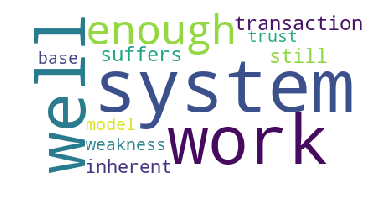

In [101]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Create and generate a word cloud image:

top_1 = corpora["bitcoin"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_1)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

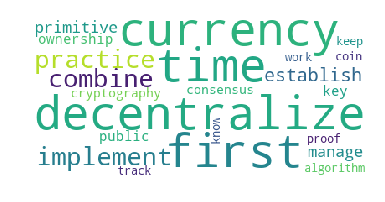

In [102]:
top_2 = corpora["ethereum"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_2)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

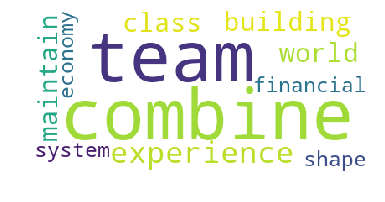

In [103]:
top_5 = corpora["binancecoin"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_5)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

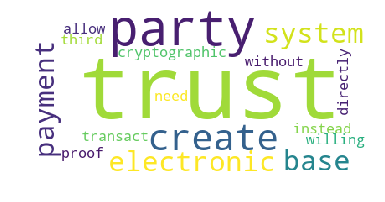

In [104]:
top_6 = corpora["tether"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_6)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

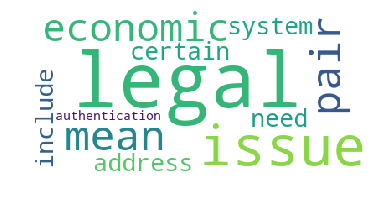

In [105]:
top_14 = corpora["ontology"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_14)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

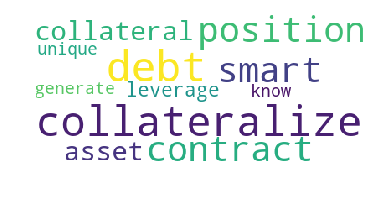

In [106]:
top_15 = corpora["maker"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_15)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

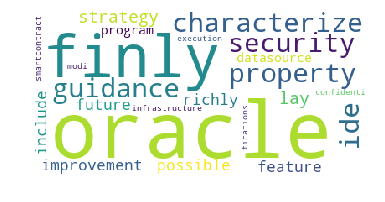

In [107]:
top_16 = corpora["chainlink"][10]
wordcloud = WordCloud(background_color="white",
                      stopwords = set(STOPWORDS)
                      ).generate(top_16)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# TFI-IDF

In [108]:
from sklearn.model_selection import train_test_split

In [109]:
tf = TfidfVectorizer()
text_tf = tf.fit_transform(corpora['0chain'])

In [110]:
X_train, X_test, y_train, y_test = train_test_split(text_tf, corpora['0chain'], test_size=0.3, random_state=123)

In [111]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print("MultinomialNB Accuracy:", metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.0


In [112]:
makeSentences = False
corpora = corpus.makeCleanCorpus(dataset, lemmatize=False, removePunct=True, removeNums=True,makeSentences=makeSentences, 
                                 removeURL=True, removeChar=True)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\laman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading en_core_web_md: Package 'en_core_web_md' not
[nltk_data]     found in index


Cleaning: 0chain
Cleaning: 0x
Cleaning: 1world
Cleaning: 1x2coin
Cleaning: ab-chain
Cleaning: abbccoin
Cleaning: abcccoin
Cleaning: able
Cleaning: absolute
Cleaning: ace
Cleaning: achain
Cleaning: acrecoin
Cleaning: actinium
Cleaning: acuteangle
Cleaning: adamant
Cleaning: adbank
Cleaning: adchainregistry
Cleaning: adcoin
Cleaning: adhive
Cleaning: aditus
Cleaning: adshares
Cleaning: aion
Cleaning: ample!
Cleaning: apollocurrency
Cleaning: ardor
Cleaning: ark
Cleaning: basicattentiontoken
Cleaning: beam
Cleaning: bhpcoin
Cleaning: bibox
Cleaning: binancecoin
Cleaning: bitcoin
Cleaning: bitcoindiamond
Cleaning: bitcoingold
Cleaning: bitshares
Cleaning: bitstash
Cleaning: bittorrent
Cleaning: budbo
Cleaning: bytecoin
Cleaning: bytom
Cleaning: celernetwork
Cleaning: chainlink
Cleaning: civictokensale
Cleaning: cosmochain
Cleaning: cosmos
Cleaning: crypto
Cleaning: cryptonex
Cleaning: cryptonote
Cleaning: dai
Cleaning: dash
Cleaning: decentraland
Cleaning: dent
Cleaning: digixdao
Cleaning:

In [113]:
from collections import Counter, defaultdict
import pandas as pd
import pandas as pd
temp = []
tokenizer = nltk.tokenize.RegexpTokenizer('\s+', gaps=True)
for h, c in corpora.items():
    temp.append(Counter(tokenizer.tokenize(c)))

term_count = pd.DataFrame.from_dict(temp).transpose()
term_count.columns = [s for s in list(corpora.keys())]
#term_count.reset_index(inplace=True)
term_count['sum_words'] = term_count.sum(axis = 1, skipna = True) 
term_count.fillna(0, inplace=True)
term_count.sort_values(by=['sum_words'], ascending=False).head(20)

,0chain,0x,1world,1x2coin,ab-chain,abbccoin,abcccoin,able,absolute,ace,...,vechain,waltonchain,wanchain,waves,wax,xrp,zcash,zerocash,zilliqa,sum_words
nerk,33.0,12.0,0.0,0.0,36.0,14.0,1.0,0.0,40.0,11.0,...,15.0,24.0,18.0,12.0,12.0,51.0,53.0,38.0,47.0,4065.0
blockchain,31.0,20.0,29.0,6.0,4.0,15.0,24.0,21.0,1.0,13.0,...,1.0,83.0,39.0,40.0,11.0,0.0,0.0,1.0,28.0,3739.0
data,35.0,8.0,18.0,0.0,3.0,6.0,5.0,13.0,0.0,5.0,...,108.0,50.0,24.0,1.0,4.0,2.0,13.0,20.0,30.0,3638.0
transaction,25.0,18.0,11.0,4.0,1.0,9.0,0.0,3.0,2.0,6.0,...,4.0,37.0,89.0,15.0,23.0,18.0,196.0,209.0,71.0,3007.0
users,8.0,23.0,12.0,6.0,2.0,21.0,23.0,50.0,7.0,5.0,...,9.0,7.0,4.0,4.0,37.0,9.0,7.0,35.0,6.0,2680.0
system,7.0,4.0,17.0,2.0,5.0,25.0,9.0,50.0,4.0,3.0,...,33.0,41.0,11.0,10.0,5.0,12.0,21.0,21.0,7.0,2513.0
nodes,6.0,1.0,2.0,2.0,0.0,1.0,0.0,2.0,12.0,0.0,...,3.0,34.0,32.0,19.0,6.0,60.0,18.0,20.0,97.0,2467.0
platform,15.0,0.0,14.0,3.0,16.0,40.0,10.0,9.0,1.0,27.0,...,18.0,13.0,6.0,10.0,76.0,0.0,0.0,0.0,13.0,2395.0
token,26.0,28.0,18.0,0.0,11.0,3.0,0.0,3.0,0.0,73.0,...,2.0,35.0,22.0,13.0,31.0,0.0,0.0,0.0,4.0,2317.0
block,55.0,8.0,0.0,9.0,1.0,6.0,2.0,0.0,12.0,3.0,...,1.0,42.0,8.0,4.0,2.0,0.0,190.0,74.0,57.0,2314.0


In [114]:
TF = term_count.iloc[:,2:9]/(term_count.iloc[:,2:9].sum(axis=0))

In [115]:
IDF = np.log(7/((term_count.iloc[:,2:9]/term_count.iloc[:,2:9]).sum(axis=1)))

In [116]:
TFIDF = TF.apply(lambda col: col*IDF)
TFIDF = pd.concat([term_count.iloc[:,:2],TFIDF], axis=1)
TFIDF['sum'] = TFIDF.sum(axis=1)

In [117]:
TFIDF.sort_values('sum', ascending=False).head(10)

,0chain,0x,1world,1x2coin,ab-chain,abbccoin,abcccoin,able,absolute,sum
protocol,49.0,48.0,0.000000,0.000857,0.000201,0.000219,0.000000,0.000725,0.000000,97.002002
time,76.0,18.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
order,2.0,82.0,0.000208,0.000000,0.000499,0.000121,0.000442,0.000200,0.000151,84.001621
block,55.0,8.0,0.000000,0.004637,0.000121,0.000790,0.000386,0.000000,0.003958,63.009894
finality,62.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.000000
token,26.0,28.0,0.001943,0.000000,0.002214,0.000657,0.000000,0.000544,0.000000,54.005358
tokens,31.0,20.0,0.003778,0.000000,0.002214,0.001096,0.000000,0.000544,0.000000,51.007631
blockchain,31.0,20.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000
contract,3.0,44.0,0.000149,0.000000,0.000055,0.000060,0.000442,0.001049,0.002418,47.004174
nerk,33.0,12.0,0.000000,0.000000,0.007244,0.003068,0.000321,0.000000,0.021946,45.032579


In [118]:
toPlot = TFIDF.sort_values('sum', ascending=False).head(10)
statistic = toPlot.iloc[:,2:9]
statistic.set_index(toPlot['0chain'] + ' ' + toPlot['zilliqa'], inplace=True)

toPlot = statistic.T
plt.figure(figsize=(18,6))
for c in toPlot:
    plt.plot(toPlot[c], label=toPlot[c].name)
plt.legend()
plt.show()

TypeError: ufunc 'add' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

## Method Application

References:
https://www.kaggle.com/rochachan/part-1-for-beginners-bag-of-words

'Bag_of_Words_tfidf_Simple_PreProcessing.ipynb' notebook by Prof. Löcher

https://towardsdatascience.com/a-complete-exploratory-data-analysis-and-visualization-for-text-data-29fb1b96fb6a